Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [3]:
!unzip gdrive/MyDrive/CNN_Assignment/CNN_assignment.zip

Archive:  gdrive/MyDrive/CNN_Assignment/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inf

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = 123,
    validation_split=0.2,
    subset = 'training',
    image_size = (img_height, img_width),
    batch_size = batch_size
    )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = 123,
    validation_split=0.2,
    subset = 'validation',
    image_size = (img_height, img_width),
    batch_size = batch_size
    )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

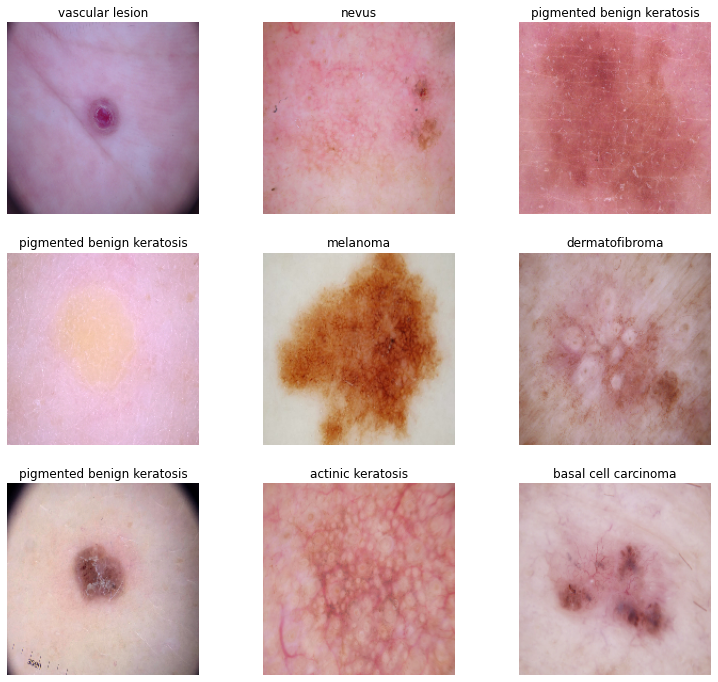

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(13, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
num_classes = 9

model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape= (img_height, img_width, 3))])

# convolutional layer
model.add(Conv2D(50, kernel_size = (3,3),strides=(1,1), padding='valid', activation='relu'))

model.add(MaxPool2D(pool_size=(3, 3)))


# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(num_classes, activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 178, 178, 50)      1400      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 59, 59, 50)        0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 174050)            0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 100)               17405100  
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 9)                 909       
Total params: 17,407,409
Trainable params: 17,407,409
Non-trainable params: 0
____________________________________________

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


56/56 [==============================] - 45s 75ms/step - loss: 3.2250 - accuracy: 0.1892 - val_loss: 2.0075 - val_accuracy: 0.2438
Epoch 2/20
56/56 [==============================] - 1s 24ms/step - loss: 1.9339 - accuracy: 0.2695 - val_loss: 1.9032 - val_accuracy: 0.3826
Epoch 3/20
56/56 [==============================] - 1s 24ms/step - loss: 1.7464 - accuracy: 0.3795 - val_loss: 1.6668 - val_accuracy: 0.4161
Epoch 4/20
56/56 [==============================] - 1s 24ms/step - loss: 1.5462 - accuracy: 0.4615 - val_loss: 1.5240 - val_accuracy: 0.4743
Epoch 5/20
56/56 [==============================] - 1s 24ms/step - loss: 1.3971 - accuracy: 0.5123 - val_loss: 1.4712 - val_accuracy: 0.5123
Epoch 6/20
56/56 [==============================] - 1s 24ms/step - loss: 1.2931 - accuracy: 0.5357 - val_loss: 1.4990 - val_accuracy: 0.4743
Epoch 7/20
56/56 [==============================] - 1s 24ms/step - loss: 1.2684 - accuracy: 0.5653 - val_loss: 1.3947 - val_accuracy: 0.5257
Epoch 8/20
56/56 [=====

### Visualizing training results

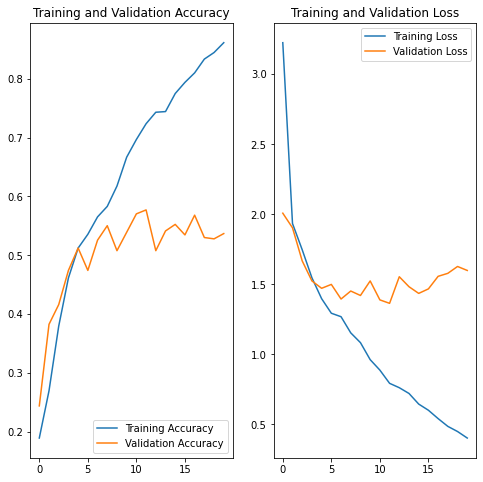

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Write your findings here


**It is evident from the Visualisation graph that the model is clearly overfitting. I tuned the hyperparameters such as Dense argument, Kernal size, CONV2D, MaxPool2D (Size), Flatten, Activation function but we did not see any significant change. I also tried different learning rate for optimizer function.Changed the Optimizer function but it did not make any difference either. "Adam" optimizer performed best followed by "Adagrad". I also tried inserting covolutional layer and use Dropouts, nothing changed the results.I used BatchNormalization as well, did not work. In the end, settled with basic model with Adam as Optimizer.**

In [18]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_aug = keras.Sequential([layers.experimental.preprocessing.RandomFlip(mode = "horizontal_and_vertical", input_shape = (img_height, img_width, 3)),
                            layers.experimental.preprocessing.RandomRotation(0.2, fill_mode = 'reflect'),
                            layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor= (0.2, 0.3), fill_mode= 'reflect')
                            ])

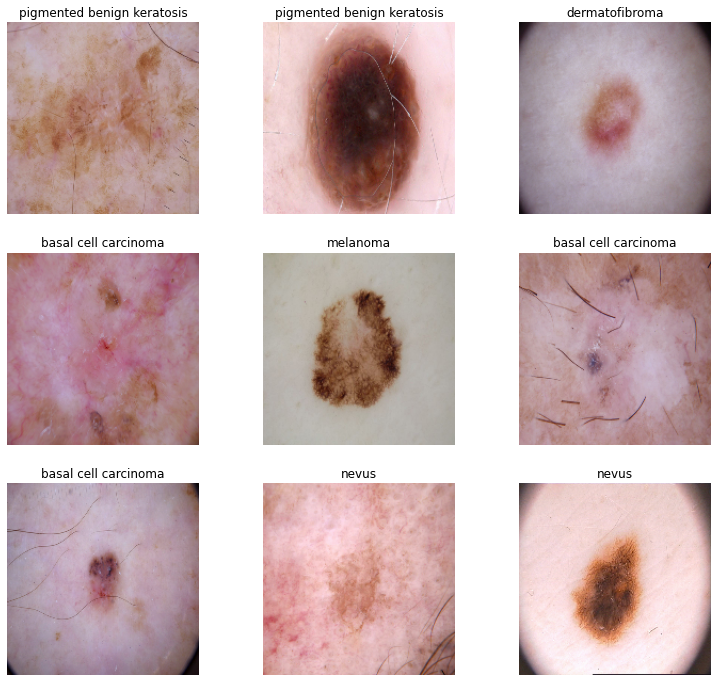

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(13, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        x = data_aug(images)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape= (img_height, img_width, 3))])

# convolutional layer
model.add(Conv2D(50, kernel_size = (3,3),strides=(1,1), padding='valid', activation='relu'))

model.add(MaxPool2D(pool_size=(3, 3)))

model.add(Dropout(0.25))


# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))

model.add(Dense(units=100, activation='relu'))
# output layer
model.add(Dense(num_classes, activation='softmax'))




### Compiling the model

In [22]:
## Your code goes here
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])


### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


56/56 [==============================] - 3s 32ms/step - loss: 2.6050 - accuracy: 0.2511 - val_loss: 1.7613 - val_accuracy: 0.4027
Epoch 2/20
56/56 [==============================] - 2s 29ms/step - loss: 1.7247 - accuracy: 0.3940 - val_loss: 1.6045 - val_accuracy: 0.4720
Epoch 3/20
56/56 [==============================] - 2s 29ms/step - loss: 1.5976 - accuracy: 0.4213 - val_loss: 1.5794 - val_accuracy: 0.4362
Epoch 4/20
56/56 [==============================] - 2s 29ms/step - loss: 1.5382 - accuracy: 0.4487 - val_loss: 1.5606 - val_accuracy: 0.4474
Epoch 5/20
56/56 [==============================] - 2s 29ms/step - loss: 1.4854 - accuracy: 0.4777 - val_loss: 1.5418 - val_accuracy: 0.4743
Epoch 6/20
56/56 [==============================] - 2s 30ms/step - loss: 1.4611 - accuracy: 0.4794 - val_loss: 1.5271 - val_accuracy: 0.4855
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 1.3849 - accuracy: 0.5067 - val_loss: 1.4039 - val_accuracy: 0.5034
Epoch 8/20
56/56 [======

### Visualizing the results

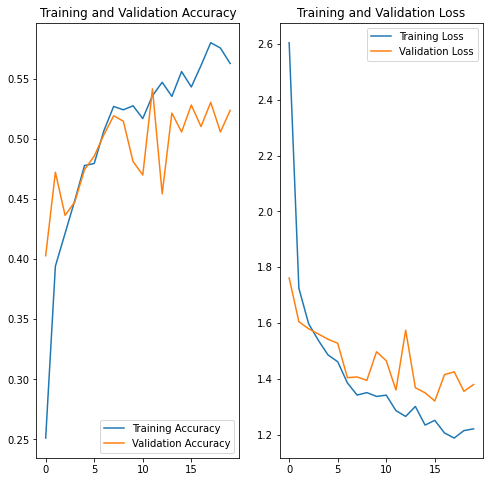

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**From the above visualization graph, It is worth noting that the Data Augmentation has significantly reduced the overfitting and result has improved a lot. I performed Hyper parameter tuning with respect to different attributes and arguments.I also used different strides followed by Drop outs. I added an extra hidden layer of 100 units that also contributed to this result. Now, I am happy with the result as of now and would like to handle Class Imbalance further. We'll see how much improvement we can achieve after wards.I tried different optimizers such as Adagrad, SGD etc. but i found that Adam is still the best optimizer.We also saw some signs of Underfitting to an extent, We will try to get rid of by handling the class imbalance.**

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [25]:
import os
from glob import glob



In [26]:
## Your code goes here.
train_image_names = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

lesion_list = [os.path.basename(os.path.dirname(y))for y in glob(os.path.join(data_dir_train, '*','*.jpg'))]


print("Total number of training images: ", len(lesion_list))

Total number of training images:  2239


In [27]:
df_dict_original = dict(zip(train_image_names, lesion_list))
df_dict_original

{'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010189.jpg': 'melanoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000144.jpg': 'melanoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0011151.jpg': 'melanoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0011057.jpg': 'melanoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010982.jpg': 'melanoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010609.jpg': 'melanoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000516.jpg': 'melanoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010663.jpg': 'melanoma',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000288.jpg': 'melanoma',
 'Skin can

In [28]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns = ['path', 'Label'])
original_df

,path,Label
0,Skin cancer ISIC The International Skin Imagin...,melanoma
1,Skin cancer ISIC The International Skin Imagin...,melanoma
2,Skin cancer ISIC The International Skin Imagin...,melanoma
3,Skin cancer ISIC The International Skin Imagin...,melanoma
4,Skin cancer ISIC The International Skin Imagin...,melanoma
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,nevus
2235,Skin cancer ISIC The International Skin Imagin...,nevus
2236,Skin cancer ISIC The International Skin Imagin...,nevus
2237,Skin cancer ISIC The International Skin Imagin...,nevus


In [29]:
# make train_image_names as serie object
train_image_names = pd.Series(train_image_names)

In [30]:
# train_df: a dataframe with 2 field: Filename, ClassId
train_df = pd.DataFrame()

# generate Filename field
train_df['Filename'] = train_image_names.map(lambda img_name: img_name.split("/")[-1])

# generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name: str(img_name.split("/")[-2]))

train_df['label'] = train_df['ClassId'].rank(method='dense', ascending=False).astype(int)

train_df

,Filename,ClassId,label
0,ISIC_0010189.jpg,melanoma,6
1,ISIC_0000144.jpg,melanoma,6
2,ISIC_0011151.jpg,melanoma,6
3,ISIC_0011057.jpg,melanoma,6
4,ISIC_0010982.jpg,melanoma,6
...,...,...,...
2234,ISIC_0028820.jpg,nevus,5
2235,ISIC_0000384.jpg,nevus,5
2236,ISIC_0026709.jpg,nevus,5
2237,ISIC_0000331.jpg,nevus,5


In [31]:
class_id_distribution = train_df['label'].value_counts()
class_id_distribution.head(10)

4    462
6    438
8    376
5    357
2    181
1    139
9    114
7     95
3     77
Name: label, dtype: int64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

Answer: Class 3 has least number of samples.
#### - Which classes dominate the data in terms proportionate number of samples?

Answer: Class 4 dominates the data in terms of proportionate number of samples.


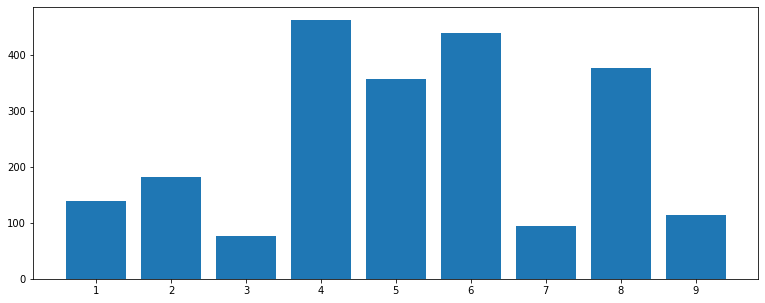

In [32]:
plt.figure(figsize=(13,5))
plt.xticks(np.arange(10))
plt.bar(class_id_distribution.index, class_id_distribution.values)
plt.show()

In [43]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()), columns = ['path','Label'])
original_df

,path,Label
0,Skin cancer ISIC The International Skin Imagin...,melanoma
1,Skin cancer ISIC The International Skin Imagin...,melanoma
2,Skin cancer ISIC The International Skin Imagin...,melanoma
3,Skin cancer ISIC The International Skin Imagin...,melanoma
4,Skin cancer ISIC The International Skin Imagin...,melanoma
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,nevus
2235,Skin cancer ISIC The International Skin Imagin...,nevus
2236,Skin cancer ISIC The International Skin Imagin...,nevus
2237,Skin cancer ISIC The International Skin Imagin...,nevus


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [34]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [35]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8A460B4450>:   0%|          | 1/500 [00:00<01:25,  5.85 Samples/s]

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8A4604C850>: 100%|██████████| 500/500 [00:17<00:00, 28.40 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8A4612C4D0>: 100%|██████████| 500/500 [00:18<00:00, 27.56 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8A46146650>: 100%|██████████| 500/500 [00:17<00:00, 27.98 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7F8A48188410>: 100%|██████████| 500/500 [01:36<00:00,  5.17 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F8A465376D0>: 100%|██████████| 500/500 [01:20<00:00,  6.23 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8A483BBA10>:   0%|          | 2/500 [00:00<00:25, 19.91 Samples/s]

Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8A464C1550>: 100%|██████████| 500/500 [00:18<00:00, 26.43 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F8A466F9DD0>: 100%|██████████| 500/500 [00:46<00:00, 10.79 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8A46477FD0>: 100%|██████████| 500/500 [00:19<00:00, 26.20 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8A4670D2D0>: 100%|██████████| 500/500 [00:18<00:00, 27.23 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [36]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [37]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0011012.jpg_7f3b5f00-042e-4992-8409-7fc36ed4164c.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010235.jpg_2dcd8db0-fbdc-4d25-a8d0-941aa1a09206.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000311.jpg_bdb9e531-de7b-46f5-8838-9402aa363155.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000167.jpg_8c602cec-d97c-4431-90dd-d266201c65d5.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010749.jpg_95bf095b-34ce-4615-bc61-54be53d3db9a.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010349.jpg_6bc7a441-3eaa-409f-a4ed-95b3b02fd009.jpg',
 'Skin cancer IS

In [38]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [39]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [40]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [41]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [47]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [49]:
data_dir_train="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size = (img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [50]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [62]:
## your code goes here
num_classes = 9

model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape= (img_height, img_width, 3))])

# convolutional layer
model.add(Conv2D(50, kernel_size = (3,3),strides=(1,1), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(3, 3), padding ='same'))

#2nd Covolutional layer

model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))

model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

model.add(BatchNormalization())

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(100, activation='relu'))

## adding Normalization Layer
model.add(BatchNormalization())

model.add(Dropout(0.25))


# output layer
model.add(Dense(num_classes, activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [63]:
## your code goes here
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [64]:
epochs = 30
## Your code goes here, use 50 epochs.

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


169/169 [==============================] - 31s 170ms/step - loss: 1.7266 - accuracy: 0.3887 - val_loss: 2.2987 - val_accuracy: 0.2205
Epoch 2/30
169/169 [==============================] - 29s 170ms/step - loss: 1.4266 - accuracy: 0.4805 - val_loss: 5.9275 - val_accuracy: 0.1373
Epoch 3/30
169/169 [==============================] - 30s 171ms/step - loss: 1.2808 - accuracy: 0.5356 - val_loss: 1.5755 - val_accuracy: 0.4098
Epoch 4/30
169/169 [==============================] - 30s 170ms/step - loss: 1.0877 - accuracy: 0.5985 - val_loss: 2.1650 - val_accuracy: 0.3964
Epoch 5/30
169/169 [==============================] - 29s 167ms/step - loss: 0.9798 - accuracy: 0.6528 - val_loss: 1.4460 - val_accuracy: 0.5026
Epoch 6/30
169/169 [==============================] - 28s 164ms/step - loss: 0.8121 - accuracy: 0.7144 - val_loss: 3.5936 - val_accuracy: 0.3318
Epoch 7/30
169/169 [==============================] - 29s 166ms/step - loss: 0.7564 - accuracy: 0.7263 - val_loss: 0.9925 - val_accuracy: 0.6

#### **Todo:**  Visualize the model results

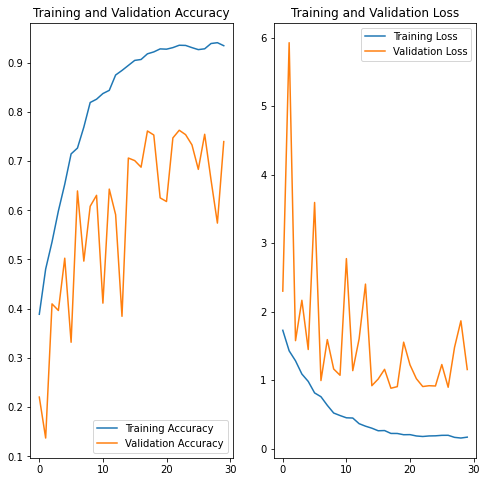

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [67]:
#Finally, I managed to derive good result here. 

# Training Accuracy ~ 94%
# Validation Accuracy ~ 75%

# After handling Class Imbalance i.e. Adding 500 images to each class, we saw that it helped improve the model. While creating the model, 
# I added an extra convolutional layer that helped. Also, as instructed I used Batch Normalization to enhance the results further. 
# I used Drop outs as well. This time I also changed the Padding value. Therefore, after doing hyper parameter tuning a lot, 
# I came up with this result.

# I got rid of overfitting when I did data augmentation, then I observed that there are some signs of Underfitting. Now, After doing Class
# Rebalance, I got rid of underfitting and got nice result in terms of Validation Accuracy.